<a href="https://colab.research.google.com/github/dropthejase/ml_training/blob/main/ml_from_scratch/ann.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
def forward(X, W1, b1, W2, b2):
  Z = 1 / (1 + np.exp(-X.dot(W1) - b1))
  A = Z.dot(W2) + b2
  expA = np.exp(A)
  Y = expA / expA.sum(axis=1, keepdims=True)
  return Y, Z

def classification_rate(Y, P):
  n_correct = 0
  n_total = 0
  for i in range(len(Y)):
      n_total += 1
      if Y[i] == P[i]:
          n_correct += 1
  return float(n_correct) / n_total

def derivative_w2(Z, T, Y):
  N, K = T.shape
  M = Z.shape[1]

  ret4 = Z.T.dot(T - Y)
  return ret4

def derivative_b2(T, Y):
  return (T-Y).sum(axis=0)

def derivative_w1(X, Z, T, Y, W2):
  N, K = X.shape
  M, K = W2.shape

  dZ = (T - Y).dot(W2.T) * Z * (1 - Z)
  ret2 = X.T.dot(dZ)

  return ret2
  
def derivative_b1(T, Y, W2, Z):
  return ((T-Y).dot(W2.T) * Z * (1-Z)).sum(axis=0)

def cost(T, Y):
  tot = T * np.log(Y)
  return tot.sum()


In [ ]:
def main():
  # create the data
  Nclass = 500
  D = 2 # dimensionality of input
  M = 3 # hidden layer size
  K = 3 # number of classes

  X1 = np.random.randn(Nclass, D) + np.array([0, -2])
  X2 = np.random.randn(Nclass, D) + np.array([2, 2])
  X3 = np.random.randn(Nclass, D) + np.array([-2, 2])
  X = np.vstack([X1, X2, X3])

  Y = np.array([0]*Nclass + [1]*Nclass + [2]*Nclass)
  N = len(Y)
  # turn Y into an indicator matrix for training
  T = np.zeros((N, K))
  for i in range(N):
    T[i, Y[i]] = 1

  # let's see what it looks like
  plt.scatter(X[:,0], X[:,1], c=Y, s=100, alpha=0.5)
  plt.show()

  # randomly initialize weights
  W1 = np.random.randn(D, M)
  b1 = np.random.randn(M)
  W2 = np.random.randn(M, K)
  b2 = np.random.randn(K)

  learning_rate = 1e-3
  costs = []
  for epoch in range(1000):
      output, hidden = forward(X, W1, b1, W2, b2)
      if epoch % 100 == 0:
          c = cost(T, output)
          P = np.argmax(output, axis=1)
          r = classification_rate(Y, P)
          print("cost:", c, "classification_rate:", r)
          costs.append(c)
      
      # maximise log likelihood
      W2 += learning_rate * derivative_w2(hidden, T, output)
      b2 += learning_rate * derivative_b2(T, output)
      W1 += learning_rate * derivative_w1(X, hidden, T, output, W2)
      b1 += learning_rate * derivative_b1(T, output, W2, hidden)

  plt.plot(costs)
  plt.show()

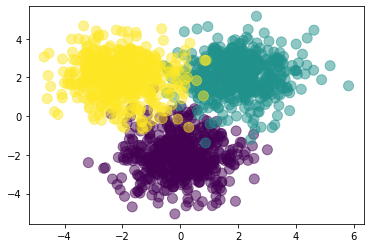

cost: -1887.929031131072 classification_rate: 0.3333333333333333
cost: -188.82989666495172 classification_rate: 0.9593333333333334
cost: -168.038487537047 classification_rate: 0.962
cost: -159.60728129387954 classification_rate: 0.9646666666666667
cost: -154.81951741943487 classification_rate: 0.9646666666666667
cost: -151.89710725541232 classification_rate: 0.9653333333333334
cost: -149.9914747488748 classification_rate: 0.9673333333333334
cost: -148.65889873906826 classification_rate: 0.9666666666666667
cost: -147.66769715431852 classification_rate: 0.9666666666666667
cost: -146.89627447687434 classification_rate: 0.9666666666666667


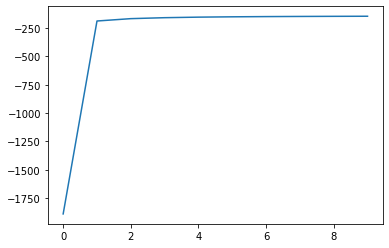

In [ ]:
if __name__ == '__main__':
  main()